# H2 VISAS

This notebook explores the dataset of H2 visa applications (https://github.com/BuzzFeedNews/H-2-certification-data#standardized-data). 

The U.S. Department of Labor releases this data as Excel (.XLS) files and BuzzFeed News has been tracking and hosting these datasets on Github. The dataset has data from fiscal year 2000 till 2016, this notebook will only take into account the data from fiscal year 2010 to 2016 (which only goes to March 31st)

There are 2 types of H2 Visas:

* H2-A: Allows foreign agricultural workers with a job offer for seasonal agricultural work in the US (https://www.uscis.gov/working-united-states/temporary-workers/h-2a-temporary-agricultural-workers)

* H2-B: Allows U.S. employers or U.S. agents who meet specific regulatory requirements to bring foreign nationals to the United States to fill temporary nonagricultural jobs (https://www.uscis.gov/working-united-states/temporary-workers/h-2b-temporary-non-agricultural-workers)

There are some predefined questions I'm looking to answer on this notebook:

* How application status have change over time
* How has the number of approved workers changed over time?
* How has the number of approved workers changed over time?
* Which states request the most visas and how has this changed over time?

**Index:**

1. Load data, first look
2. Filter by fiscal year
3. Duplicates 
4. Data cleaning (for each column)
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 


### 1. Load data, first look

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import vincent
%matplotlib inline
plt.style.use('fivethirtyeight')

# load data
h2visas_df = pd.read_csv(".\\datasets\\H-2-certification-decisions.csv", low_memory=False)

First, we check the number of columns, the names of these, and we print the first few rows of the data set to get an idea of how it looks like

In [2]:
# shape and column names
print("Number of columns/rows:")
print(h2visas_df.shape)
print("-------------------\nColumns:")
print(h2visas_df.columns)
h2visas_df.head(4)

Number of columns/rows:
(213155, 22)
-------------------
Columns:
Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city',
       'employer_address_1', 'employer_address_2', 'employer_postal_code',
       'worksite_state', 'worksite_city', 'agent_name', 'organization_flag',
       'is_duplicate'],
      dtype='object')


,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1.0,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5.0,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Other important features to check are the column types, and the number of missing values. For missing values I'll use a new library that visualizes them, this will allow us to see where the missing values are located.

In [ ]:
#column types
print('------ Column types:')
print(h2visas_df.info())

print('\n----------------------------------\n')

# number of nulls per column
print('------ Missing values:')
print(h2visas_df.isnull().sum())

------ Column types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213155 entries, 0 to 213154
Data columns (total 22 columns):
case_no                     213155 non-null object
visa_type                   213155 non-null object
fy                          213155 non-null int64
last_event_date             205686 non-null object
case_status                 213155 non-null object
n_requested                 141512 non-null float64
n_certified                 213155 non-null int64
is_certified                213155 non-null bool
certification_begin_date    155351 non-null object
certification_end_date      155342 non-null object
job_title                   212671 non-null object
employer_name               213133 non-null object
employer_state              213029 non-null object
employer_city               213076 non-null object
employer_address_1          169205 non-null object
employer_address_2          21596 non-null object
employer_postal_code        168879 non-null object
works

In [ ]:
msno.matrix(h2visas_df)

Most `NaN` values are at the beginning of the data set, and we know the rows are sorted by date so analyzing years from 2010 onward will get rid of many missing values. 

To end this part we check how many visas of each kind we have

In [ ]:
print(h2visas_df.visa_type.value_counts())
h2visas_df.visa_type.value_counts().plot.bar()
plt.title("H2 Visas - types")
plt.xticks(rotation='horizontal', size=15)
plt.show()

As we can see there are more H-2B visas than H-2A visas

### 2. Filter by fiscal year

I'll work from data starting October 1, 2010 to March 31, 2016. Which means fiscal year of 2011 in advance

In [ ]:
h2visas_df = h2visas_df[h2visas_df["fy"] >= 2011]

Let's visualize the NaN values and check for types of Visasagain:

In [ ]:
msno.matrix(h2visas_df)

In [ ]:
print(h2visas_df.visa_type.value_counts())
h2visas_df.visa_type.value_counts().plot.bar()
plt.title("H2 Visas - types")
plt.xticks(rotation='horizontal', size=15)
plt.show()

### 3. Duplicates

There is a column that tells us if a entry is a duplicate. Let's see if we the dataset comes with any duplicates and to which kind of visa they belong

In [ ]:
h2visas_df['visa_type'][h2visas_df['is_duplicate'] == True].value_counts()

All duplicates are visas H-2A 

If we examined the data closer we see that 'case_no' also has duplicates for H-2B visas:

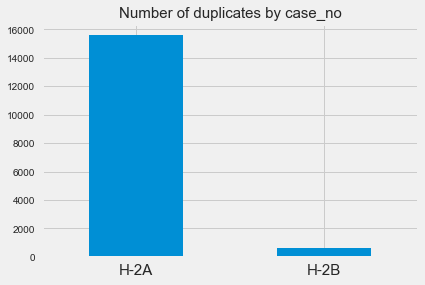


-------------------------
Example of H-2B duplicate:


,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
200324,H-400-15155-885907,H-2B,2015,2015-07-28,CERTIFICATION,14.0,14,True,2015-08-03,2015-11-01,...,NJ,CHESTER,1 ALSTEDE FARMS LANE,"MAILING: PO BOX 278, CHESTER, NJ 07930",07930,NJ,NaN,FEDERATION OF EMPLOYERS AND WORKERS OF AMERICA...,NaN,NaN
208692,H-400-15155-885907,H-2B,2016,2015-10-20,WITHDRAWN,14.0,0,False,2015-08-03,2015-11-01,...,NJ,CHESTER,1 ALSTEDE FARMS LANE,"MAILING: PO BOX 278, CHESTER, NJ 07930",7930.0,NJ,NaN,FEDERATION OF EMPLOYERS AND WORKERS OF AMERICA...,NaN,NaN
208720,H-400-15155-885907,H-2B,2016,2015-10-20,WITHDRAWN,NaN,0,False,2015-08-03,2015-11-01,...,NJ,CHESTER,1 ALSTEDE FARMS LANE,"MAILING: PO BOX 278, CHESTER, NJ 07930",7930,NJ,Chester,FEDERATION OF EMPLOYERS AND WORKERS OF AMERICA...,NaN,NaN


In [10]:
h2visas_df['visa_type'][h2visas_df.duplicated('case_no')].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal',size=15)
plt.title("Number of duplicates by case_no",size=15)
plt.show()

print("\n-------------------------")
print("Example of H-2B duplicate:")
h2visas_df[h2visas_df['case_no']=='H-400-15155-885907']

This makes sense though, here is the description of the `is_duplicate` field:

*This derived value will be  True  — indicating that this row corresponds a sub-application of a joint employer's "master application" — if (a)  visa_type  is "H-2A", (b) the  organization_flag  is blank, and (c) comes from fiscal year 2008 or later. H-2A data from FY 2006 and FY 2007 do not contain a  organization_flag  field. For these records, and H-2B records,  is_duplicate  will be  null*

Let's get rid of H-2A duplicates and also get rid of H-2B duplicates

In [13]:
# split visas
h2visasA_df = h2visas_df[h2visas_df['visa_type']== 'H-2A']
h2visasB_df = h2visas_df[h2visas_df['visa_type']== 'H-2B']
# delete duplicates
h2visasA_df = h2visasA_df[h2visasA_df['is_duplicate']==True]
h2visasB_df = h2visasB_df.drop_duplicates('case_no','first')
# concatenate 
h2visas_df = pd.concat([h2visasA_df,h2visasB_df])

### 4. Data cleaning (for each column)

### 4.1 visa_type

In [17]:
print('Number of visa type nulls:')
h2visas_df.visa_type.isnull().sum()

Number of visa type nulls:


0

H-2B    29499
H-2A    19314
Name: visa_type, dtype: int64


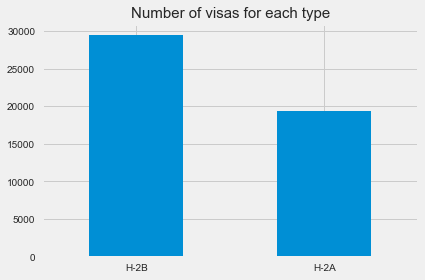

In [18]:
print(h2visas_df["visa_type"].value_counts())
h2visas_df["visa_type"].value_counts().plot(kind='bar')
plt.title("Number of visas for each type", size=15)
plt.xticks(rotation='horizontal')
plt.show()

### 4.2  case status & is_certified
There are many case status but some of them mean the same thing. I will simplify them into 5 different statuses (Cerfified, In_progress, Denied, Expired, and Withdrawn ) 

In [20]:
#case_status counts
h2visas_df["case_status"].value_counts()

CERTIFICATION                                           16969
CERTIFIED                                                8166
CERTIFIED - FULL                                         6119
DETERMINATION ISSUED - CERTIFICATION                     5417
DENIED                                                   3286
PARTIAL CERTIFIED                                        3193
PARTIAL CERTIFICATION                                    2034
WITHDRAWN                                                1796
CERTIFIED - PARTIAL                                      1273
CERTIFICATION EXPIRED                                     320
DETERMINATION ISSUED - PARTIAL CERTIFICATION               95
PARTIAL CERTIFICATION EXPIRED                              75
DETERMINATION ISSUED - CERTIFICATION EXPIRED               49
DETERMINATION ISSUED - WITHDRAWN                            9
DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED        8
DETERMINATION ISSUED - DENIED                               4
Name: ca

In [21]:
Certified = ['CERTIFIED - FULL','CERTIFIED','CERTIFIED, TEMPORARY','DETERMINATION ISSUED - CERTIFICATION','CERTIFICATION',]
Partial = ['PARTIAL CERTIFIED','CERTIFIED - PARTIAL','PARTIAL CERTIFICATION','DETERMINATION ISSUED - PARTIAL CERTIFICATION']
Denied = ['DENIED','DENIED, TEMPORARY','DETERMINATION ISSUED - DENIED','REDUCTION IN RECRUITMENT DENIED','NOF ISSUED','INCOMPLETE']
In_progress = ['RECEIVED REGIONAL OFFICE','RECEIVED','REMAND TO SWA','REMAND ISSUED TO EMPLOYER','REMAND ISSUED TO STATE','FINAL REVIEW','DATA REVIEW','RETURNED BY EMP AFTER REMAND','MODIFICATION']
Withdrawn = ['WITHDRAWN','DETERMINATION ISSUED - WITHDRAWN']
Expired = ['PARTIAL CERTIFICATION EXPIRED','DETERMINATION ISSUED - CERTIFICATION EXPIRED','CERTIFICATION EXPIRED','DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED']

def classify_status(status):
    new_status = status
    if status in Certified:
        new_status = 'Certified'
    elif status in Partial:
        new_status = 'Partial'
    elif status in Denied:
        new_status = 'Denied'
    elif status in In_progress:
        new_status = 'In_progress'
    elif status in Withdrawn:
        new_status = 'Withdrawn'
    elif status in Expired:
        new_status = 'Expired'
    return new_status

h2visas_df["case_status_sum"] = h2visas_df["case_status"].map(lambda x: classify_status(x))
print("New classification:")
h2visas_df["case_status_sum"].value_counts()

New classification:


Certified    36671
Partial       6595
Denied        3290
Withdrawn     1805
Expired        452
Name: case_status_sum, dtype: int64

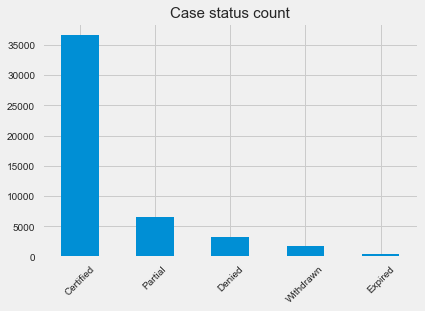

In [22]:
h2visas_df["case_status_sum"].value_counts().plot(kind='bar')
plt.title("Case status count", size=15)
plt.xticks(rotation=45)
plt.show()

`is_certified (True / False)` is a standardization of the `case_status` field.

In the following output we see that is_certified column contains partial and expired applications. Not certified also contains a few of them.

This part will need more research.

In [23]:
print(" -------------- is certified ------------ ")
print(h2visas_df["case_status_sum"][h2visas_df["is_certified"] == True].value_counts())
print(" \n-------------- is NOT certified --------- ")
print(h2visas_df["case_status_sum"][h2visas_df["is_certified"] == False].value_counts())

 -------------- is certified ------------ 
Certified    36340
Partial       6553
Expired        446
Name: case_status_sum, dtype: int64
 
-------------- is NOT certified --------- 
Denied       3290
Withdrawn    1805
Certified     331
Partial        42
Expired         6
Name: case_status_sum, dtype: int64


In [28]:
print("Number of NaN:")
print(h2visas_df[["case_status_sum","is_certified"]].isnull().sum())

Number of NaN:
case_status_sum    0
is_certified       0
dtype: int64


### 4.3 n_requested & n_certified

In [30]:
#Nulls
print("Number of NaN:")
print(h2visas_df[["n_requested","n_certified"]].isnull().sum())

Number of NaN:
n_requested    16134
n_certified        0
dtype: int64


Let's check the distribution for each kind of VISA

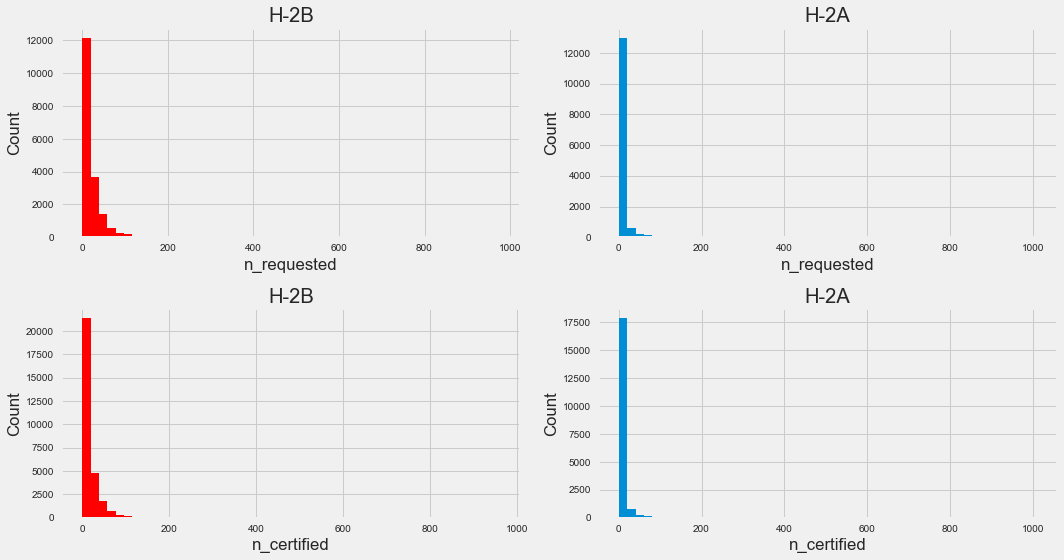

In [35]:
# show histogram of n_requested and n_certified under 150 for both types of visas capping at 200
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))
ax1.set(xlabel='n_requested' , ylabel='Count', title='H-2B')
ax2.set(xlabel='n_requested' , ylabel='Count', title='H-2A')
ax3.set(xlabel='n_certified' , ylabel='Count', title='H-2B')
ax4.set(xlabel='n_certified' , ylabel='Count', title='H-2A')
ax1.hist(h2visas_df.n_requested[h2visas_df.visa_type == 'H-2B'].dropna(),bins=50,color='r')
ax2.hist(h2visas_df.n_requested[h2visas_df.visa_type == 'H-2A'].dropna(),bins=50) 
ax3.hist(h2visas_df.n_certified[h2visas_df.visa_type == 'H-2B'],bins=50,color='r')
ax4.hist(h2visas_df.n_certified[h2visas_df.visa_type == 'H-2A'],bins=50) 
plt.tight_layout()
plt.show()

As we can see there are some outliers. Let's zoom in to where most of the data is:

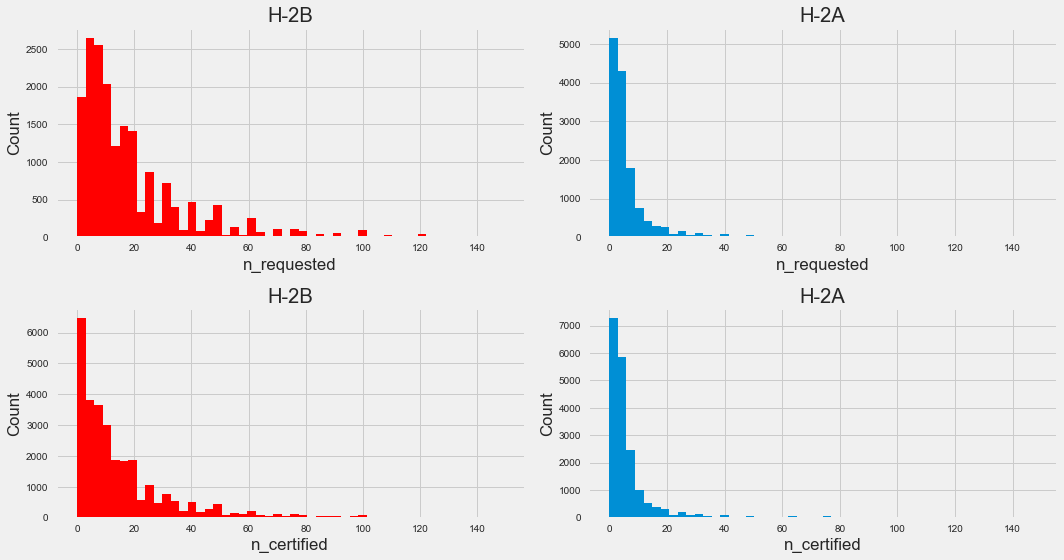

In [34]:
# show histogram of n_requested and n_certified under 150 for both types of visas
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))
ax1.set(xlabel='n_requested' , ylabel='Count', title='H-2B')
ax2.set(xlabel='n_requested' , ylabel='Count', title='H-2A')
ax3.set(xlabel='n_certified' , ylabel='Count', title='H-2B')
ax4.set(xlabel='n_certified' , ylabel='Count', title='H-2A')
ax1.hist(h2visas_df.n_requested[(h2visas_df.visa_type == 'H-2B') & (h2visas_df.n_requested < 150)],bins=50,color='r')
ax2.hist(h2visas_df.n_requested[(h2visas_df.visa_type == 'H-2A') & (h2visas_df.n_requested < 150)],bins=50) 
ax3.hist(h2visas_df.n_certified[(h2visas_df.visa_type == 'H-2B') & (h2visas_df.n_certified < 150)],bins=50,color='r')
ax4.hist(h2visas_df.n_certified[(h2visas_df.visa_type == 'H-2A') & (h2visas_df.n_certified < 150)],bins=50) 
plt.tight_layout()
plt.show()

The number of outliers is not that big if we compare them to the size of the data set. Based on the histograms I consider outliers those over 150

In [36]:
print('number of n_request over 150:')
print(len(h2visas_df[h2visas_df.n_requested > 150]))
print('number of n_certified over 150:')
print(len(h2visas_df[h2visas_df.n_certified > 150]))

number of n_request over 150:
222
number of n_certified over 150:
265


Checking some of them. They seem legit so I'll leave them. I could do further reasearch on this though. Here is one as an example

In [37]:
h2visas_df[h2visas_df.n_requested == 1714.0]

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,case_status_sum


There are a few cases were n_certified is bigger than n_requested. This is wrong.

In [ ]:
h2visas_df[['visa_type','fy','case_status_sum','n_requested','n_certified']][h2visas_df.n_certified > h2visas_df.n_requested]

As they are very few I'll fix them manually. I'll drop Partials and fix Certified

In [ ]:
h2visas_df.loc[151531,"n_certified"] = 9
h2visas_df.drop(191287,inplace=True)
h2visas_df.drop(199495,inplace=True)
h2visas_df.loc[210837,"n_certified"] = 8
h2visas_df.loc[211604,"n_certified"] = 6
h2visas_df.drop(212263,inplace=True)
h2visas_df.loc[212714,"n_certified"] = 2

In [ ]:
print("What values are in n_certified when n_requested is NaN? :")
h2visas_df.case_status_sum[h2visas_df.n_requested.isnull()].value_counts()

I can fix n_requested for the ones that are certified because I know that all visas requested were granted, so I'll copy the value of n_certified to n_requested. 

In [ ]:
new_values = h2visas_df.n_certified[(h2visas_df.case_status_sum == 'Certified') & (h2visas_df.n_requested.isnull())]
h2visas_df.n_requested[(h2visas_df.case_status_sum == 'Certified') & (h2visas_df.n_requested.isnull())]
h2visas_df.loc[new_values.index,'n_requested']= new_values

I can't do nothing for the rest so I'll leave the as they are:

In [ ]:
h2visas_df.case_status_sum[h2visas_df.n_requested.isnull()].value_counts()

Some values have n_requested and n_certified iqual to 0, but all are Denied. So I'll set n_requested to NaN because I assume that you can not apply for 0 visas:

In [ ]:
h2visas_df[['case_status_sum','n_requested','n_certified']][h2visas_df['n_requested'] == 0]

In [ ]:
h2visas_df.loc[(h2visas_df['n_requested'] == 0) & (h2visas_df['case_status_sum'] == 'Denied'),'n_requested'] = np.nan

# last_event_date

First, let's convert all date columns to datetime

In [ ]:
#convert to datetime
h2visas_df["last_event_date"] = pd.to_datetime(h2visas_df["last_event_date"])
h2visas_df["certification_begin_date"] = pd.to_datetime(h2visas_df["certification_begin_date"])
h2visas_df["certification_end_date"] = pd.to_datetime(h2visas_df["certification_end_date"])

Check last_event_date for nulls:

In [ ]:
print ("Nulls last_event_date:")
vc = h2visas_df["visa_type"][h2visas_df["last_event_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

# certification_begin_date & certification_end_date

Check end Cerfication begin dates and Certification end dates

In [ ]:
print ("Nulls certification_begin_date:")
vc = h2visas_df["visa_type"][h2visas_df["certification_begin_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

In [ ]:
print ("Nulls certification_end_date:")
vc = h2visas_df["visa_type"][h2visas_df["certification_end_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

Let's check the time in between certification_begin_date and certification_end_date in days:

In [ ]:
date_aux = h2visas_df.loc[(h2visas_df['certification_begin_date'].notnull()) & (h2visas_df['certification_end_date'].notnull()),['certification_begin_date','certification_end_date']]
diff = ((date_aux.certification_end_date - date_aux.certification_begin_date) / np.timedelta64(1, 'D')).astype(int)
diff.hist(bins=100)
plt.title("Difference in days between begin_date and end_date", size=15)
plt.xticks(rotation=45)

It seems there are many outliers, let's zoom in:

In [ ]:
diff[(diff < 400) & (diff > 30)].hist(bins=30)
plt.title("Difference in days between begin_date and end_date", size=15)
plt.xticks(rotation=45)

The length of visas are usually less than a year. We could consider outliers the ones that have a difference greater than 400 or less than 30. How many are there?

In [ ]:
len(diff[(diff > 400) | (diff < 30)])

Let's set these to NaN for the purpose of our analysis. Further analysis could be done here though.

In [ ]:
h2visas_df.loc[diff[(diff > 400) | (diff<30)].index,'certification_end_date'] = np.nan
h2visas_df.loc[diff[(diff > 400) | (diff<30)].index,'certification_begin_date'] = np.nan

Let's check distributions of certification_end_date and certification_begin_date

In [ ]:
print("certification_end_date:")
h2visas_df['certification_end_date'].dt.year.dropna().astype(int).value_counts().sort_index()

Now let's do the same with certification_begin_date

In [ ]:
h2visas_df['certification_begin_date'].dt.year.dropna().astype(int).value_counts().sort_index()

Ploting the results

In [ ]:
begin = h2visas_df['certification_begin_date'].dt.year.dropna().astype(int).value_counts().sort_index()
end = h2visas_df['certification_end_date'].dt.year.dropna().astype(int).value_counts().sort_index()

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))
ax1.set(xlabel='certification_begin_date' , ylabel='Count', title='Certification begin')
ax2.set(xlabel='certification_end_date' , ylabel='Count', title='Certification end')
ax1.bar(begin.index[2:], begin.values[2:],width=0.4, color='r',align='center')
ax2.bar(end.index[2:], end.values[2:],width=0.4, color='b',align='center') 
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
plt.tight_layout()
plt.show()

# job_title

In [ ]:
print('Number of nulls:')
h2visas_df.fy.isnull().sum()

In [ ]:
print('How many job titles?:')
len(h2visas_df.job_title.value_counts())

In [ ]:
h2visas_df.job_title.value_counts()[:20].plot(kind='bar')
plt.title("20 most common job titles", size=15)
plt.show()

As we can see some names repeat themself. TODO: group jobs that have similar words

# organization_flag

In [ ]:
print('Number of nulls:')
h2visas_df.organization_flag.isnull().sum()

With so many nulls I'll probably get rid of this column

In [ ]:
print(h2visas_df.organization_flag.value_counts().sort_values())
ofg = h2visas_df.groupby('organization_flag')
ofg.aggregate(np.median).n_requested.plot(kind='bar')
plt.title("Count of org flag tipes", size=15)
plt.show()

As we can see below the letters only happend in 2011 to 2013. Probably there was a change of the format sometime on 2013 and we can join them together. Further analysis needed.

In [ ]:
h2visas_df.groupby('organization_flag')['fy'].value_counts().unstack(level=1,fill_value=0)

# FY

In [ ]:
print('Number of nulls:')
h2visas_df.fy.isnull().sum()

In [ ]:
#counts
h2visas_df.fy.value_counts()

# Employer state

In [ ]:
print('Number of nulls:')
h2visas_df.employer_state.isnull().sum()

We can fix this by getting the state from the city

In [ ]:
cities = h2visas_df['employer_city'][h2visas_df.employer_state.isnull()].value_counts()
cities

I'll use google maps to get the state, in case I can't find it I'll leave it as NaN.

In [ ]:
import requests
dic_add = {} # to save what we find online
for city in cities.index:
    city = city.strip()
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address='+city+'NorthAmerica'
    try:        
        response = requests.get(url)
        resp_json_payload = response.json()
        dic_add[city]=(resp_json_payload['results'][0]['address_components'][2]['short_name'])
        if len(dic_add[city])>2:
            dic_add[city]=np.nan
    except:
        dic_add[city]=np.nan
          
#show results gotten from google maps
print("Results from quering google maps:")
for k,v in dic_add.items():
    print("Address: {0:20} Status: {1}".format(str(k),str(v)))

Using results to fix states:

In [ ]:
print("Fixing .....")
for i in h2visas_df['employer_city'][h2visas_df.employer_state.isnull()].dropna().index:
    h2visas_df.loc[i,('employer_state')]=dic_add[str((h2visas_df.loc[i]['employer_city']).strip())]
print("... done fixing")
print("All fixed but: ")
h2visas_df.employer_state.isnull().sum()

Let's check now if any of the states on the data doesn't exist

In [ ]:
us_states = ['AL','AK','AZ','AR','CA','CO','CT','DC','DE','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
             'MN','MS','MO','MP','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT',
             'VI','VT','VA','WA','WV','WI','WY']
can_states = ['AB','BC','MB','NB','NL','NT','NS','NU','ON','PE','QC','SK','YT']

In [ ]:
# what states are wrong?
wrong_states = []
for state in h2visas_df.employer_state.value_counts().index:
    if (state not in us_states) and (state not in can_states) and (state not in wrong_states):
        wrong_states.append(state)
print('Non existent states:')
wrong_states

Let's see if I can figure out which state is this by looking at the city

In [ ]:
h2visas_df[['employer_state','employer_city','employer_address_1', 'employer_address_2', 'employer_postal_code','worksite_state', 'worksite_city']][h2visas_df['employer_state'] == 'NF']

It looks the city is in Canada/Saskatchewan (SK).Let's fix it:

In [ ]:
h2visas_df.loc[h2visas_df.employer_state == 'NF','employer_state'] = 'SK'

# Worksite state

We'll see if there are any wrong states and fix it

In [ ]:
print('Number of nulls:')
h2visas_df.employer_state.isnull().sum()

In [ ]:
# what states are wrong?
wrong_states = []
for state in h2visas_df.worksite_state.value_counts().index:
    if (state not in us_states) and (state not in can_states) and (state not in wrong_states):
        wrong_states.append(state)
print('Non existent states:')
wrong_states

In [ ]:
h2visas_df.worksite_state.value_counts().loc[wrong_states]

Let's check these rows and fix the states by looking up where the cities are manually:

In [ ]:
h2visas_df.loc[h2visas_df.worksite_state == 'KA',['employer_city']]

In [ ]:
h2visas_df.loc[h2visas_df.worksite_state == 'FM',['employer_city']]

In [ ]:
h2visas_df.loc[h2visas_df.worksite_state == 'MH',['employer_city']]

In [ ]:
print("fixing ....")
h2visas_df.loc[h2visas_df.worksite_state == 'KA',['worksite_state']] = 'KS'
h2visas_df.loc[h2visas_df.worksite_state == 'MH',['worksite_state']] = 'MI'
h2visas_df.loc[h2visas_df.worksite_state == 'FM',['worksite_state']] = 'FL'
print("\n.... done")

# 5. Delete columns I don't need for my analysis or are not useful (many Nulls)

In [ ]:
h2visas_df.columns

In [ ]:
h2visas_df.drop(['is_duplicate','agent_name','worksite_city','employer_address_2','case_status','organization_flag'], axis=1, inplace=True)

In [ ]:
msno.matrix(h2visas_df)

I could also delete the few rows I have with nulls but they don't bother me right now so I'll leave that for now

# 6. Analysis
Stats for year 2016 are shown in the quantitative measures but not plotted because we only have data for 3 months of 2016 and the plot could be misleading.

# a) How application status have change over time

In [ ]:
apgp = h2visas_df.groupby(['fy','case_status_sum'])['fy'].count()
to_plot = apgp.unstack(level=1,fill_value=0)
to_plot

In [ ]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((1,1), (0, 0))
ax1.set(xlabel='Year' , ylabel='Count', title='Case Status over time',xticks=(np.arange(2011, 2016, 1.0)))
ax1.ticklabel_format(useOffset=False)
ax1.plot(to_plot.loc[:2015])
ax1.legend(apgp.index.levels[1],loc=0,prop={'size':15})
plt.tight_layout()
plt.show()

# b) How have the number of approved workers changed over time?

In [ ]:
fygb = h2visas_df.groupby('fy')
to_plot = fygb['n_requested','n_certified'].aggregate(np.sum)
to_plot

In [ ]:
fig = plt.figure(figsize=(12,6))
ax2 = plt.subplot2grid((1,1), (0, 0))
ax2.set(xlabel='Year' , ylabel='Sum', title='Requested and certifed Visas over time',xticks=(np.arange(2011, 2016, 1.0)))
ax2.ticklabel_format(useOffset=False)
ax2.plot(to_plot.index[:-1],to_plot.values[:-1])
ax2.legend(to_plot.columns,loc=0,prop={'size':15})
plt.tight_layout()
plt.show()

# c) Which states request the most visas and how has this changed over time?

Let's check the top 10 states and plot how the applications of these states have changed over time

In [ ]:
top10_states = h2visas_df.employer_state.value_counts().index[:11]
top10_states

In [ ]:
apgp = h2visas_df[h2visas_df["employer_state"].isin(top10_states)].groupby(['fy','employer_state'])['fy'].count()
to_plot = apgp.unstack(level=1,fill_value=0)
to_plot

In [ ]:
fig = plt.figure(figsize=(25,12))
ax1 = plt.subplot2grid((1,1), (0, 0))
ax1.set(xlabel='Year' , ylabel='Count', title='State applications over time',xticks=(np.arange(2011, 2016, 1.0)))
ax1.ticklabel_format(useOffset=False)
ax1.plot(to_plot.loc[:2015])
ax1.legend(apgp.index.levels[1],loc=0,prop={'size':18})
plt.tight_layout()
plt.show()

# d) Number of VISAS per state (all applications)

In [ ]:
# create new column with the key for vincent maps
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National',
        'NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico',
        'NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico',
        'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
        'VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont', 'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia',
        'WY': 'Wyoming','AB': 'Alberta','BC': 'British Columbia','MB': 'Manitoba','NB': 'New Brunswick','NL': 'Newfoundland and Labrador',
        'NT': 'Northwest Territories','NS': 'Nova Scotia','NU': 'Nunavut','ON': 'Ontario','PE': 'Prince Edward Island',
        'QC': 'Quebec','SK': 'Saskatchewan','YT': 'Yukon'}


In [ ]:
h2visas_df.dropna(subset=["employer_state"], axis=0, inplace=True)
h2visas_df["employer_states_full"] = h2visas_df["employer_state"].map(lambda m: states[m])
state_visas = pd.DataFrame()
state_visas['NAME']=h2visas_df["employer_states_full"].value_counts().index
state_visas['DATA']=h2visas_df["employer_states_full"].value_counts().values

vincent.core.initialize_notebook()
state_topo = "https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_states.topo.json"
geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]

vis = vincent.Map(data=state_visas,geo_data = geo_data, scale = 1000, projection = 'albersUsa',data_bind='DATA' , data_key='NAME',map_key={'states': 'properties.NAME'})
vis.scales[0].type='threshold'
vis.scales[0].domain = list(range(0, 6000,750))
vis.legend(title='Visa applications per US state')

vis.to_json('vega.json')
vis.display()

In [ ]:
from IPython.display import Image
Image(filename='map1.png') 

# e) Number of worksites states

In [ ]:
h2visas_df.dropna(subset=["worksite_state"], axis=0, inplace=True)
h2visas_df["working_states_full"] = h2visas_df["worksite_state"].map(lambda m: states[m])
state_visas = pd.DataFrame()
state_visas['NAME']=h2visas_df["working_states_full"].value_counts().index
state_visas['DATA']=h2visas_df["working_states_full"].value_counts().values

vincent.core.initialize_notebook()
state_topo = "https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_states.topo.json"
geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]

vis = vincent.Map(data=state_visas,geo_data = geo_data, scale = 1000, projection = 'albersUsa',data_bind='DATA' , data_key='NAME',map_key={'states': 'properties.NAME'})
vis.scales[0].type='threshold'
vis.scales[0].domain = list(range(0, 6000,750))
vis.legend(title='Visa applications per US state')

vis.to_json('vega.json')
vis.display()

In [ ]:
Image(filename='map2.png') 

In [ ]:
#saving dataframe
h2visas_df.to_csv("h2visas_df.csv",index=False)